# Y3 IBC PET Research Reads

The following code will plot the Y3 IBC Research Tau PET results by diagnosis.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import file
mastersheet = pd.read_excel("/Users/jep9731/Desktop/imaging_diagnosis_mastersheet_2024-03-05.xlsx")
mastersheet

,global_id,redcap_repeat_instance,modality,redcap_event_name,ptid,case_num_sa,case_num_ppa,case_num_tau_pet,case_num_cog_lang,case_num_clinical_trial,...,tau_read_researcher_source5,tau_read_researcher_notes,tau_clinical_read1,tau_clinical_read_source1,tau_clinical_read2,tau_clinical_read_source2,tau_clinical_read_consensus,tau_clinical_read_notes,tau_suvr_sl,mri_scanner
0,v2UVCCvPPl4TA_gr3,1,amyloid,imaging_visit_arm_1,1028,NaN,NaN,NaN,NaN,067-0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,v2UVCCvPPl4TA_gr3,7,mri,imaging_visit_arm_1,1028,NaN,NaN,NaN,NaN,067-0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prisma
2,v2UVCCvPPl4TA_gr3,2,amyloid,imaging_visit_arm_1,1028,NaN,NaN,NaN,NaN,067-0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,v2UVCCvPPl4TA_gr3,3,tau,imaging_visit_arm_1,1028,NaN,NaN,NaN,NaN,067-0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v2UVCCvPPl4TA_gr3,4,tau,imaging_visit_arm_1,1028,NaN,NaN,NaN,NaN,067-0056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,yn5N5YdZEBFeatPKN,5,amyloid,imaging_visit_arm_1,979,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,g5F1Ag7HYmCqV_Z0g,1,tau,imaging_visit_arm_1,2411,NaN,P192,NaN,F074,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,Aih1hjGLOtStKDKFd,2,mri,imaging_visit_arm_1,2178,NaN,C80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prisma
2161,cAchRHeIaD3drSkJ_,1,mri,imaging_visit_arm_1,982,SA102,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trio


In [3]:
# Filtering mastersheet
mastersheet_filtered = mastersheet[(mastersheet["modality"] == "tau") | 
                                (mastersheet["modality"] == "amyloid") &
                                (mastersheet["study_affiliation"] == "ADRC_IC")]

print(mastersheet_filtered.head())

# Removing columns
print(mastersheet_filtered.columns)

mastersheet_clean = mastersheet_filtered[["ptid", "scan_date", "modality", "study_affiliation", "diagnosis_time_of_visit", "amyloid_clinical_read_consensus",
                                          "tau_read_researcher1"]]
print(mastersheet_clean.head())

mastersheet_clean = mastersheet_clean[(mastersheet_clean["study_affiliation"] == "ADRC_IC") &
                                (mastersheet_clean["scan_date"] >= "2023-02-01") & 
                                (mastersheet_clean["scan_date"] <= "2024-01-31")]
print(mastersheet_clean.head())

             global_id  redcap_repeat_instance modality    redcap_event_name  \
3    v2UVCCvPPl4TA_gr3                       3      tau  imaging_visit_arm_1   
4    v2UVCCvPPl4TA_gr3                       4      tau  imaging_visit_arm_1   
6    v2UVCCvPPl4TA_gr3                       5      tau  imaging_visit_arm_1   
26   9DNJL9urax_7_9-sF                       2  amyloid  imaging_visit_arm_1   
101  xeAICOEIyDkyRHGLd                      10      tau  imaging_visit_arm_1   

     ptid case_num_sa case_num_ppa case_num_tau_pet case_num_cog_lang  \
3    1028         NaN          NaN              NaN               NaN   
4    1028         NaN          NaN              NaN               NaN   
6    1028         NaN          NaN              NaN               NaN   
26   1103       SA255          NaN              NaN               NaN   
101  1350         NaN           P5              X01               NaN   

    case_num_clinical_trial  ...  tau_read_researcher_source5  \
3              

In [4]:
# Amyloid scans
mastersheet_clean_amyloid = mastersheet_clean[mastersheet_clean["modality"] == "amyloid"]
print(mastersheet_clean_amyloid.head())

# Tau scans
mastersheet_clean_tau = mastersheet_clean[mastersheet_clean["modality"] == "tau"]
print(mastersheet_clean_tau.head())

      ptid  scan_date modality study_affiliation diagnosis_time_of_visit  \
596   2261 2023-02-01  amyloid           ADRC_IC                      NC   
801    842 2023-02-22  amyloid           ADRC_IC                      NC   
1018  1890 2023-03-14  amyloid           ADRC_IC                      NC   
1038  2153 2023-03-14  amyloid           ADRC_IC                     PPA   
1105  2310 2023-03-16  amyloid           ADRC_IC                      NC   

     amyloid_clinical_read_consensus tau_read_researcher1  
596                         Negative                  NaN  
801                         Negative                  NaN  
1018                        Positive                  NaN  
1038                        Negative                  NaN  
1105                        Negative                  NaN  
      ptid  scan_date modality study_affiliation diagnosis_time_of_visit  \
628   2095 2023-02-02      tau           ADRC_IC                      NC   
635   2270 2023-02-16      tau 

In [5]:
# Split by positive/negative
## Amyloid positive
Amyloid_pos = mastersheet_clean_amyloid[mastersheet_clean_amyloid["amyloid_clinical_read_consensus"] == "Positive"]
print(Amyloid_pos)

## Amyloid negative
Amyloid_neg = mastersheet_clean_amyloid[mastersheet_clean_amyloid["amyloid_clinical_read_consensus"] == "Negative"]
print(Amyloid_neg)

## Tau posiitve
Tau_pos = mastersheet_clean_tau[mastersheet_clean_tau["tau_read_researcher1"] == "Positive"]
print(Tau_pos)

## Tau negative
Tau_neg = mastersheet_clean_tau[mastersheet_clean_tau["tau_read_researcher1"] == "Negative"]
print(Tau_neg)

      ptid  scan_date modality study_affiliation diagnosis_time_of_visit  \
1018  1890 2023-03-14  amyloid           ADRC_IC                      NC   
1508   620 2023-04-12  amyloid           ADRC_IC                      NC   
1657  2401 2023-06-13  amyloid           ADRC_IC                     PPA   
1724  2184 2023-07-25  amyloid           ADRC_IC                     DAT   
1978  2240 2023-10-17  amyloid           ADRC_IC                      NC   
1986  2416 2023-10-31  amyloid           ADRC_IC                      NC   
2071   910 2023-11-16  amyloid           ADRC_IC                     DAT   

     amyloid_clinical_read_consensus tau_read_researcher1  
1018                        Positive                  NaN  
1508                        Positive                  NaN  
1657                        Positive                  NaN  
1724                        Positive                  NaN  
1978                        Positive                  NaN  
1986                        Pos

In [6]:
# Counting amyloid positive and negative diagnoses
## Positive
ct_NC_pos_new_amy = (Amyloid_pos['diagnosis_time_of_visit'] == 'NC').sum()
print("NC pos: ", ct_NC_pos_new_amy)

ct_DAT_pos_new_amy = (Amyloid_pos['diagnosis_time_of_visit'] == 'DAT').sum()
print("AD pos: ", ct_DAT_pos_new_amy)

ct_PPA_pos_new_amy = (Amyloid_pos['diagnosis_time_of_visit'] == 'PPA').sum()
print("PPA pos: ", ct_PPA_pos_new_amy)

ct_FTD_pos_new_amy = (Amyloid_pos['diagnosis_time_of_visit'] == 'FTD').sum()
print("FTD pos: ", ct_FTD_pos_new_amy)

## Negative
ct_NC_neg_new_amy = (Amyloid_neg['diagnosis_time_of_visit'] == 'NC').sum()
print("NC neg: ", ct_NC_neg_new_amy)

ct_DAT_neg_new_amy = (Amyloid_neg['diagnosis_time_of_visit'] == 'DAT').sum()
print("AD neg: ", ct_DAT_neg_new_amy)

ct_PPA_neg_new_amy = (Amyloid_neg['diagnosis_time_of_visit'] == 'PPA').sum()
print("PPA neg: ", ct_PPA_neg_new_amy)

ct_FTD_neg_new_amy = (Amyloid_neg['diagnosis_time_of_visit'] == 'FTD').sum()
print("FTD neg: ", ct_FTD_neg_new_amy)

NC pos:  4
AD pos:  2
PPA pos:  1
FTD pos:  0
NC neg:  7
AD neg:  1
PPA neg:  10
FTD neg:  1


In [7]:
# Counting Tau positive and negative diagnoses
## Positive
ct_NC_pos_new_tau = (Tau_pos['diagnosis_time_of_visit'] == 'NC').sum()
print("NC pos: ", ct_NC_pos_new_tau)

ct_DAT_pos_new_tau = (Tau_pos['diagnosis_time_of_visit'] == 'DAT').sum()
print("AD pos: ", ct_DAT_pos_new_tau)

ct_PPA_pos_new_tau = (Tau_pos['diagnosis_time_of_visit'] == 'PPA').sum()
print("PPA pos: ", ct_PPA_pos_new_tau)

ct_FTD_pos_new_tau = (Tau_pos['diagnosis_time_of_visit'] == 'FTD').sum()
print("FTD pos: ", ct_FTD_pos_new_tau)

## Negative
ct_NC_neg_new_tau = (Tau_neg['diagnosis_time_of_visit'] == 'NC').sum()
print("NC neg: ", ct_NC_neg_new_tau)

ct_DAT_neg_new_tau = (Tau_neg['diagnosis_time_of_visit'] == 'DAT').sum()
print("AD neg: ", ct_DAT_neg_new_tau)

ct_PPA_neg_new_tau = (Tau_neg['diagnosis_time_of_visit'] == 'PPA').sum()
print("PPA neg: ", ct_PPA_neg_new_tau)

ct_FTD_neg_new_tau = (Tau_neg['diagnosis_time_of_visit'] == 'FTD').sum()
print("FTD neg: ", ct_FTD_neg_new_tau)

NC pos:  0
AD pos:  3
PPA pos:  2
FTD pos:  1
NC neg:  20
AD neg:  0
PPA neg:  4
FTD neg:  0


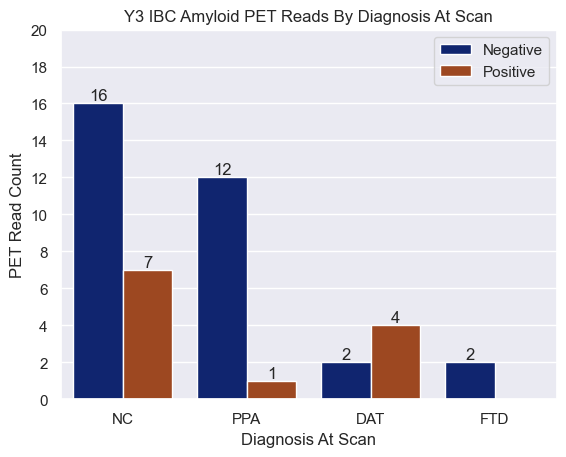

In [8]:
# Amyloid read only graph
sns.set_theme()

ax = sns.countplot(mastersheet_clean, x="diagnosis_time_of_visit", hue="amyloid_clinical_read_consensus", palette="dark")
ax.set_ylabel("PET Read Count")
ax.set_xlabel("Diagnosis At Scan")
ax.set_title("Y3 IBC Amyloid PET Reads By Diagnosis At Scan")
ax.set_yticks(np.arange(0, 22, 2))
ax.legend()

for bar in ax.patches[0:]:
    h = bar.get_height()
    x = bar.get_x()+bar.get_width()/2
    if h != 0:
        ax.annotate("%g" % bar.get_height(), xy=(x,h), xytext=(0,0), 
                   textcoords="offset points", ha="center", va="bottom", size = 12)

#plt.savefig("Y3_ICB_Tau_Research_Reads_plot1_3.7.24.png")
plt.show()

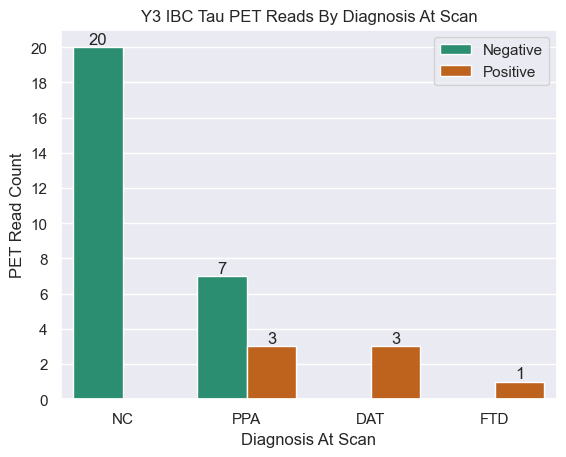

In [9]:
# Tau Read only graph
sns.set_theme()

ax = sns.countplot(mastersheet_clean, x="diagnosis_time_of_visit", hue="tau_read_researcher1", palette="Dark2")
ax.set_ylabel("PET Read Count")
ax.set_xlabel("Diagnosis At Scan")
ax.set_title("Y3 IBC Tau PET Reads By Diagnosis At Scan")
ax.set_yticks(np.arange(0, 22, 2))
ax.legend()

for bar in ax.patches[0:]:
    h = bar.get_height()
    x = bar.get_x()+bar.get_width()/2
    if h != 0:
        ax.annotate("%g" % bar.get_height(), xy=(x,h), xytext=(0,0), 
                   textcoords="offset points", ha="center", va="bottom", size = 12)

#plt.savefig("Y3_ICB_Tau_Research_Reads_plot1_3.7.24.png")
plt.show()

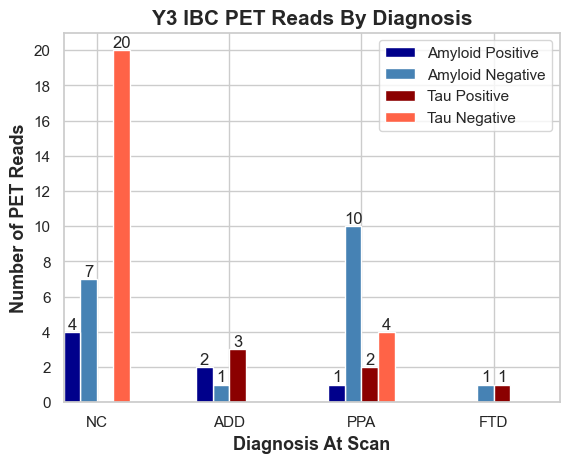

In [32]:
# Combined graph (with title)
sns.set_theme(style="whitegrid")

bar_plot1t = pd.DataFrame({'Amyloid Negative': [ct_NC_neg_new_amy, ct_DAT_neg_new_amy, ct_PPA_neg_new_amy, 
                                              ct_FTD_neg_new_amy],
                         'Amyloid Positive': [ct_NC_pos_new_amy, ct_DAT_pos_new_amy, ct_PPA_pos_new_amy,
                                              ct_FTD_pos_new_amy]},
                        index=['NC', 'AD', 'PPA', 'FTD'])  # add other index if needed

ax1 = bar_plot1t.plot(kind='bar', stacked=False, rot=0, align='edge', width=-.25, 
                      color=['steelblue', 'darkblue'], alpha=1.0, lw=1, label=["Amyloid Negative", "Amyloid Positive"])


bar_plot2t = pd.DataFrame({'Tau Positive': [ct_NC_pos_new_tau, ct_DAT_pos_new_tau, ct_PPA_pos_new_tau,
                                             ct_FTD_pos_new_tau],
                           'Tau Negative': [ct_NC_neg_new_tau, ct_DAT_neg_new_tau, ct_PPA_neg_new_tau,
                                             ct_FTD_neg_new_tau]},
                          index=['NC', 'ADD', 'PPA', 'FTD'])  # add other index if needed

ax2 = bar_plot2t.plot(kind='bar', ax=ax1, stacked=False, rot=0, align='edge', width=.25,
                      color=['darkred', 'tomato'], alpha=1.0, lw=1, label=["Tau Positive", "Tau Negative"])

for bar in ax2.patches:
    h = bar.get_height()
    x = bar.get_x()+bar.get_width()/2
    if h != 0:
        ax2.annotate("%g" % bar.get_height(), xy=(x,h), xytext=(0,0), 
                   textcoords="offset points", ha="center", va="bottom", size = 12)

plt.title('Y3 IBC PET Reads By Diagnosis', weight='bold', fontsize=15)
plt.ylabel('Number of PET Reads', weight='bold', fontsize=13)
plt.xlabel('Diagnosis At Scan', weight='bold', fontsize=13)

# reordering the labels 
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [1, 0, 2, 3] # amyloid positive, amyloid negative, tau positive, tau negative
  
# pass handle & labels lists along with order as below 
plt.legend([handles[i] for i in order], [labels[i] for i in order])

ax2.set_yticks(np.arange(0, 22, 2))
plt.savefig("Y3_PET_reads_plot1_3.11.24.png")
plt.show()

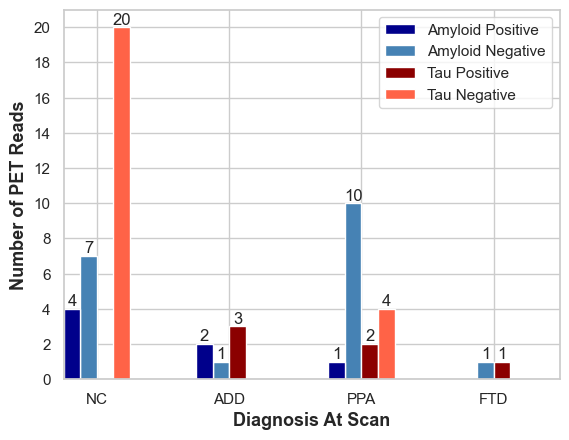

In [31]:
#Combined graph (no title)
sns.set_theme(style="whitegrid")

bar_plot1t = pd.DataFrame({'Amyloid Negative': [ct_NC_neg_new_amy, ct_DAT_neg_new_amy, ct_PPA_neg_new_amy, 
                                              ct_FTD_neg_new_amy],
                         'Amyloid Positive': [ct_NC_pos_new_amy, ct_DAT_pos_new_amy, ct_PPA_pos_new_amy,
                                              ct_FTD_pos_new_amy]},
                        index=['NC', 'AD', 'PPA', 'FTD'])  # add other index if needed

ax1 = bar_plot1t.plot(kind='bar', stacked=False, rot=0, align='edge', width=-.25, 
                      color=['steelblue', 'darkblue'], alpha=1.0, lw=1, label=["Amyloid Negative", "Amyloid Positive"])


bar_plot2t = pd.DataFrame({'Tau Positive': [ct_NC_pos_new_tau, ct_DAT_pos_new_tau, ct_PPA_pos_new_tau,
                                             ct_FTD_pos_new_tau],
                           'Tau Negative': [ct_NC_neg_new_tau, ct_DAT_neg_new_tau, ct_PPA_neg_new_tau,
                                             ct_FTD_neg_new_tau]},
                          index=['NC', 'ADD', 'PPA', 'FTD'])  # add other index if needed

ax2 = bar_plot2t.plot(kind='bar', ax=ax1, stacked=False, rot=0, align='edge', width=.25,
                      color=['darkred', 'tomato'], alpha=1.0, lw=1, label=["Tau Positive", "Tau Negative"])

for bar in ax2.patches:
    h = bar.get_height()
    x = bar.get_x()+bar.get_width()/2
    if h != 0:
        ax2.annotate("%g" % bar.get_height(), xy=(x,h), xytext=(0,0), 
                   textcoords="offset points", ha="center", va="bottom", size = 12)

plt.ylabel('Number of PET Reads', weight='bold', fontsize=13)
plt.xlabel('Diagnosis At Scan', weight='bold', fontsize=13)

# reordering the labels 
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [1, 0, 2, 3] # amyloid positive, amyloid negative, tau positive, tau negative
  
# pass handle & labels lists along with order as below 
plt.legend([handles[i] for i in order], [labels[i] for i in order])

ax2.set_yticks(np.arange(0, 22, 2))
plt.savefig("Y3_PET_reads_plot2_3.11.24.png")
plt.show()